# Implementing Convolutions

In [8]:
import numpy as np
import tqdm
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Setting plot styles
# sns.set_style('white')
# mpl.rcParams.update({
#     'font.size': 14,
#     'lines.linewidth': 2,
#     'figure.figsize': (6, 6 / 1.61)
# })
# mpl.rcParams['grid.color'] = 'k'
# mpl.rcParams['grid.linestyle'] = ':'
# mpl.rcParams['grid.linewidth'] = 0.5
# mpl.rcParams['lines.markersize'] = 6
# mpl.rcParams['lines.marker'] = None
# mpl.rcParams['axes.grid'] = True

# DEFAULT_FONTSIZE = 13
# mpl.rcParams.update({
#     'font.size': DEFAULT_FONTSIZE,
#     'lines.linewidth': 2,
#     'legend.fontsize': DEFAULT_FONTSIZE,
#     'axes.labelsize': DEFAULT_FONTSIZE,
#     'xtick.labelsize': DEFAULT_FONTSIZE,
#     'ytick.labelsize': DEFAULT_FONTSIZE,
#     'figure.figsize': (7, 7.0 / 1.4)
# })
K = keras.backend
# 
# # Setting python hash seed
# import os
# seed_value = 0
# os.environ['PYTHONHASHSEED'] = str(seed_value)
# 
# # All my homies hate scientific notation
# np.set_printoptions(suppress=True)

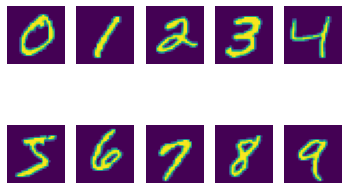

In [ ]:
# Plotting each of the ten digits
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = (X_train / 255.).astype(np.float32)[:, :, :, np.newaxis]
y_train = y_train

fig, axes = plt.subplots(2, 5)
axes = axes.ravel()

inds = []
for y in range(10):
    inds.append(np.argmax(y == y_train))
ten_digits = X_train[inds]

for digit, ax in zip(ten_digits, axes):
    ax.grid('off')
    ax.axis('off')
    ax.imshow(digit.reshape(28, 28), cmap='viridis')

In [ ]:
# Training MNIST CNN
K.clear_session()
class DigitNet(keras.models.Model):
    # Basically a very small and light VGG
    def __init__(self, input_shape,**kwargs):
        super(DigitNet, self).__init__(input_shape, **kwargs)

        self.inp = keras.layers.Input(shape=input_shape)
        self.l1 = keras.layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='he_normal')
        self.l2 = keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='he_normal')
        self.l3 = keras.layers.MaxPool2D(2, 2)
        self.l4 = keras.layers.Conv2D(64, 3, activation='relu', kernel_initializer='he_normal')
        self.l5 = keras.layers.Conv2D(64, 3, activation='relu', kernel_initializer='he_normal')
        self.l6 = keras.layers.MaxPool2D(2, 2)
        self.l7 = keras.layers.Conv2D(32, 1, activation='relu', kernel_initializer='he_normal')
        self.l8 = keras.layers.AvgPool2D(5, 1)
        self.l9 = keras.layers.Flatten()
        self.l10 = keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal')
        self.l11 = keras.layers.Dense(10, activation='softmax', kernel_initializer='he_normal')
        
        self.__call__(self.inp)
        self.build(tuple([None] + list(input_shape)))
        
    def call(self, x):
        return self.__call__(x)
    
    def __call__(self, x, training=True):
        x = self.l1(x)
        x = self.l2(x)
        x = self.l3(x)
        x = self.l4(x)
        x = self.l5(x)
        x = self.l6(x)
        x = self.l7(x)
        x = self.l8(x)
        x = self.l9(x)
        x = self.l10(x)
        x = self.l11(x)
        return x

# Batching dataset
AUTOTUNE = tf.data.experimental.AUTOTUNE
dset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).prefetch(AUTOTUNE)

# Instantiate model
model = DigitNet((28, 28, 1))
model.summary()
optimizer = keras.optimizers.SGD(learning_rate=0.05)
loss_fn = keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=5)

Model: "digit_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 32)          20

In [ ]:
# Creating keras Conv2D layer, copy weights
tf.random.set_seed(2)
keras.layers.Conv2D()

In [12]:
l1 = keras.layers.Dense(30)
l1.weights

[]

In [13]:
import torch

In [17]:
linear = torch.nn.Linear(30, 50)
linear.weight.shape

torch.Size([50, 30])

In [ ]:
linear.weight.shape

In [19]:
linear.bias.shape

torch.Size([50])

In [28]:
x = torch.arange(30 * 1, dtype=torch.float32).reshape((1, 30))
linear(x).shape

torch.Size([1, 50])

In [33]:
linear.weight.matmul(x.T).T

tensor([[-16.8266,  13.1608,  20.5150,  10.9528,   5.2927,   0.0946,   4.4391,
         -25.9943, -14.7486,  -4.5530,   7.2458,  -7.1704,  15.8641,   7.8664,
         -15.2641,  -0.3370,  15.5980,  -1.5737,  -2.8545,  13.7244, -12.8769,
           8.9590,  14.5763,   8.8955, -16.2508,  -1.1676,   1.8376,  -0.0687,
          13.9144,   7.0558,   7.6362,  13.2377,   3.5098,  -0.5692,  -4.6141,
           8.8477,  -6.2314,  -7.6535,   6.7422,   0.4052, -12.3918,  -9.6725,
         -18.5491,  14.5852,  27.4325,  17.9957,  -8.3361,   3.5522,  25.3806,
         -14.6808]], grad_fn=<PermuteBackward0>)

In [38]:
y = torch.arange(30 * 50, dtype=torch.float32).reshape(30, 50)
x.matmul(y).shape

torch.Size([1, 50])

In [53]:
y_pred = torch.tensor([0.95, 0.8, 0.1, 0.17])
y_true = torch.tensor([1., 0., 0., 1.])

-(y_true * y_pred.log() + (1 - y_true) * (1 - y_pred).log()).sum()

tensor(3.5380)

In [47]:
torch.nn.functional.binary_cross_entropy(y_pred, y_true, reduction='sum')

tensor(3.5380)